In [297]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
import scipy.stats as sts
from sklearn import preprocessing

In [362]:
input = pd.read_csv("alturas.csv")
anomalias = pd.read_csv("anomalias.csv")

In [71]:
pd.DataFrame({'Null %': input.isnull().sum() * 100 / len(input)})

,Null %
Estatura,0.000000
Edad,14.285714


**As we can see the field Edad contains 14.28% of NULL values, which we will fill with the mean (27.50) of the field.**

In [72]:
input.Edad.fillna(value=round(input.Edad.mean(),1),inplace=True)

**We verify again the values and we can see that there is no more NULL values in them.**

In [73]:
pd.DataFrame({'Null %': input.isnull().sum() * 100 / len(input)})

,Null %
Estatura,0.0
Edad,0.0


In [74]:
input.describe()

,Estatura,Edad
count,21.000000,21.000000
mean,1.731429,27.500000
std,0.073504,3.837317
min,1.570000,21.000000
25%,1.660000,25.000000
50%,1.740000,26.000000
75%,1.780000,31.000000
max,1.850000,34.000000


(array([1., 1., 2., 7., 1., 3., 0., 1., 2., 3.]),
 array([21. , 22.3, 23.6, 24.9, 26.2, 27.5, 28.8, 30.1, 31.4, 32.7, 34. ]),
 <a list of 10 Patch objects>)

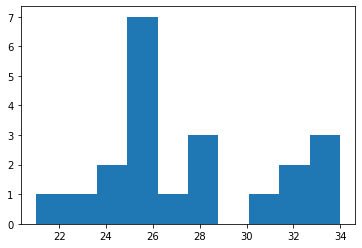

In [77]:
plt.hist(input.Edad)

(array([1., 0., 3., 2., 1., 3., 3., 5., 1., 2.]),
 array([1.57 , 1.598, 1.626, 1.654, 1.682, 1.71 , 1.738, 1.766, 1.794,
        1.822, 1.85 ]),
 <a list of 10 Patch objects>)

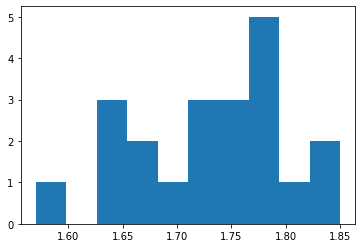

In [78]:
plt.hist(input.Estatura)

Text(0, 0.5, 'Altura')

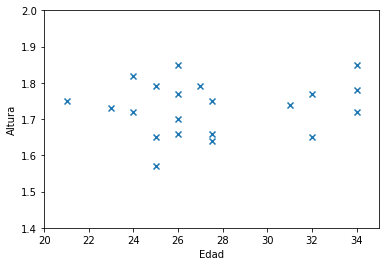

In [95]:
plt.scatter(input.Edad, input.Estatura,marker="x")
plt.xlim(20,35)
plt.ylim(1.4,2)
plt.xlabel("Edad")
plt.ylabel("Altura")

**Get mean and variance for the input dataframe**

In [88]:
mu = np.mean(input)
sigma2 = np.var(input)

In [93]:
print("Mu:\n", mu)
print("\nSigma2:\n", sigma2)

Mu:
 Estatura     1.731429
Edad        27.500000
dtype: float64

Sigma2:
 Estatura     0.005146
Edad        14.023810
dtype: float64


**Function to get manually the probability of an X**

In [375]:
# Function to get probability of X based on a normal distribution with mean and variance


def p(X, mu, sigma2):
    norm = sts.norm(mu, sigma2)
    out = norm.pdf(X)
    return out

In [381]:
def prob(X, mu, sigma2):
    px0 = p(X[0], mu[0], sigma2[0])
    px1 = p(X[1], mu[1], sigma2[1])
    out = px0 * px1
    return out

In [378]:
prob(input, mu, sigma2)

array([1.37853728e-012, 5.33882014e-001, 1.81466337e-001, 8.87876448e-020,
       8.73201584e-055,             nan,             nan, 9.82709784e-116,
       1.08790430e-115, 2.93925623e-003, 2.01568994e+000, 1.61269929e-028,
       9.79832247e-065, 9.04841288e-055, 1.58828554e-028, 1.68140376e-001,
       1.73819768e-008, 4.12893936e-214, 3.14308058e-042,             nan,
       1.31687356e-012])

In [379]:
prob(anomalias, mu, sigma2)

array([0., 0., 0., 0.])

In [388]:
epsilon = 4.12893936e-300
def test(edad=27.5, estatura=1.73):
    res = prob([estatura, edad], mu, sigma2)
    if res>epsilon:
        print("Valor normal")
    else:
        print("Anomalia")
    

In [389]:
test(27.5,1.73)

Valor normal


In [390]:
test(0.25,2.4)

Anomalia


In [393]:
test(26,1.57)

Valor normal


In [394]:
test(26,1.54)

Anomalia
